## Multivariate continuous distributions
We can define a joint distribution function for two variables as $F(x,y)=P\{(x'<x)\cap(y'<y)\}$.

Some properties:

- $F(\infty,\infty)=1$
- $F(-\infty,y)=F(x,-\infty)=0$

$F$ also has to be monotone increasing. 

We can define the probability density (which is vastly more useful) based on this: $f(x,y)=\frac{\partial^2F}{\partial x\partial y}$

In the discrete case, the density is $p(x,y)=P(x'=x,y'=y)$. This mixed partial is sort of the infinitesimal limit for this in a continuous case.

All this gives us our normalization: $\int_x\int_yf(x,y)\,\mathrm{d}x\mathrm{d}y=1$

Given a joint distribution, can we extract the marginal distributions by projecting out one of the variables:
$f_x(x)=\int f(x,y)\,\mathrm{d}y$    and    $f_y(y)=\int f(x,y)\,\mathrm{d}x$

And Bayes’ Theorem will give us conditional probabilities if we want them: $f_x(x\mid y)=\frac{f(x,y)}{f_y(y)}$

Moments of multivariate distributions
Given a joint distribution, we can calculate its moments.

Means: $\mu_x=E(x)$ and $\mu_y=E(y)$
Variances: $\sigma_x^2=E((x-\mu_x)^2)$ and $\sigma_y^2=E((y-\mu_y)^2)$ also $\sigma_{xy}=E((x-\mu_x)(y-\mu_y))$

In general, $\mu_{\ell m}=E(x^\ell y^m)$ and $\mu_{\ell m}'=E[(x-\mu_x)^\ell(y-\mu_y)^m]$

How do you calculate these expectation values? $E(g(x,y))=\int_x\int_y g(x,y)\cdot f(x,y)\,\mathrm{d}x\,\mathrm{d}y$

The interesting moment here is the mixed moment: $\sigma_{xy}=E((x-\mu_x)(y-\mu_y))$

This is called the covariance. Sometime we write it as $\text{cov}(x,y)$. It can also be calculated as $E(xy)-E(x)E(y)$.

## Correlation
If the covariance is nonzero, we say that $x$ and $y$ are correlated. 
This means that the mean value of $y$ depends on the chosen value for $x$, and vice versa.
For example a person’s height is correlated with their weight.

One issue here is that $\text{cov}(x,y)$ is not bounded. So it’s hard to look at this value and gauge the degree of correlation. To solve this we use a dimensionless correlation coefficient,
$\rho_{xy}=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$

Because of Cauchy-Schwarz, $\lvert\rho_{xy}\rvert\leq 1$.
This $\rho$ is called Pearson’s correlation coefficient and is sometimes called $r$. It measures the linear relationship between two variables.

# Covariance and correlation

Let's build some intuition with covariance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get data
def get_data(k,group):
    pts = np.genfromtxt('%s_%d.txt' % (group,k), delimiter=',')    # read in file
    x = [n[0] for n in pts]    # get x values
    y = [n[1] for n in pts]    # get y values
    return x,y

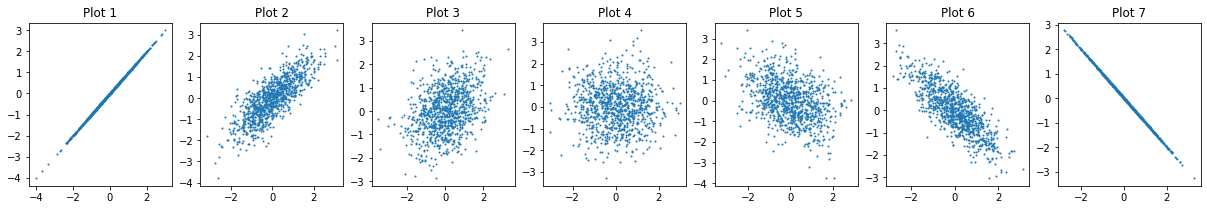

In [3]:
# let's see what the data look like
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(21,3))
for k in range(len(ax)):
    x,y = get_data(k,'noise')
    ax[k].scatter(x,y, s=1)
    ax[k].title.set_text('Plot %d'%(k+1))

In [8]:
def correlation_coefficient(cov_matrix):
    return cov_matrix[0][1]/(np.sqrt(cov_matrix[0][0]*cov_matrix[1][1]))

In [12]:
plotnum = 3
x,y = get_data(plotnum-1,'noise')
M = np.cov(x,y)
print(M)

[[0.96032832 0.33222874]
 [0.33222874 0.90800558]]


In [13]:
correlation_coefficient(M)

0.35578125899614294

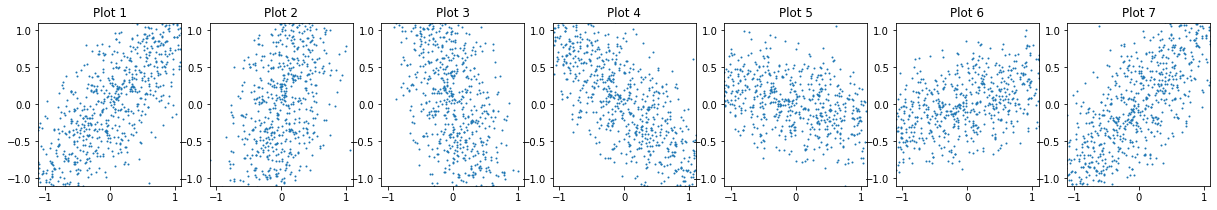

In [14]:
# dependence on slope
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(21,3))
for k in range(len(ax)):
    x,y = get_data(k,'slope')
    ax[k].scatter(x,y, s=1)
    ax[k].title.set_text('Plot %d'%(k+1))
    ax[k].set_ylim(-1.1,1.1)
    ax[k].set_xlim(-1.1,1.1)

In [17]:
plotnum = 1
x,y = get_data(plotnum-1,'slope')
M = np.cov(x,y)
print(M)
correlation_coefficient(M)

[[1.00686627 0.90788169]
 [0.90788169 1.0254247 ]]


0.8934936581853244

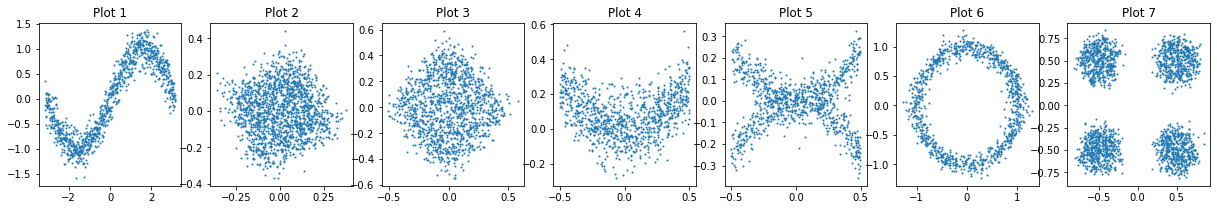

In [18]:
# nonlinearities
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(21,3))
for k in range(len(ax)):
    x,y = get_data(k,'nonlinear')
    ax[k].scatter(x,y, s=1)
    ax[k].title.set_text('Plot %d'%(k+1))

In [19]:
plotnum = 6
x,y = get_data(plotnum-1,'nonlinear')
M = np.cov(x,y)
print(M)
correlation_coefficient(M)

[[0.50523071 0.01609916]
 [0.01609916 0.50131268]]


0.03198924297656086